In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

Properties for G_1 after removing nodes with degree 0:
  Node count: 10734
  Edge count: 13477
  Average degree: 2.5110862679336687
  Density: 0.00023395940258396242
  Average clustering coefficient: 0.03399794205026417



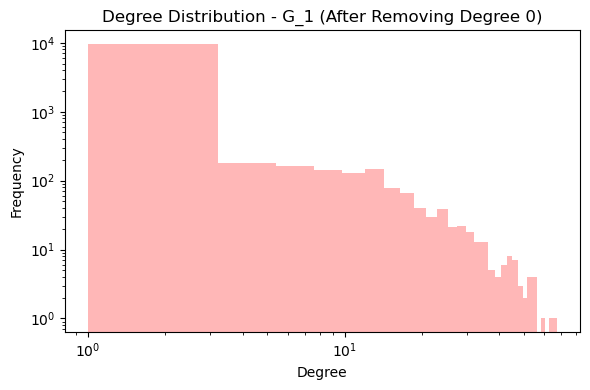

Properties for G_2 after removing nodes with degree 0:
  Node count: 5287
  Edge count: 6355
  Average degree: 2.4040098354454322
  Density: 0.00045478808843084226
  Average clustering coefficient: 0.03541647319974693



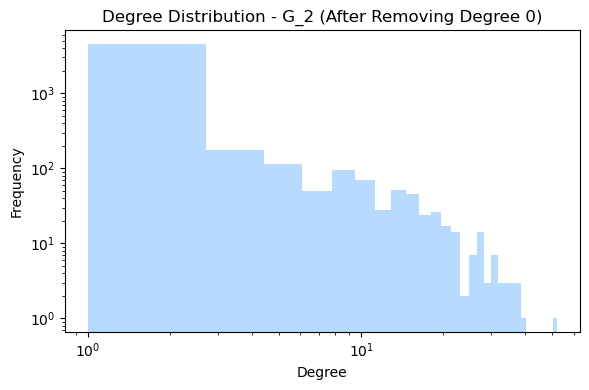

Properties for G_3 after removing nodes with degree 0:
  Node count: 3149
  Edge count: 3247
  Average degree: 2.0622419815814546
  Density: 0.0006550959280754303
  Average clustering coefficient: 0.022163908709307557



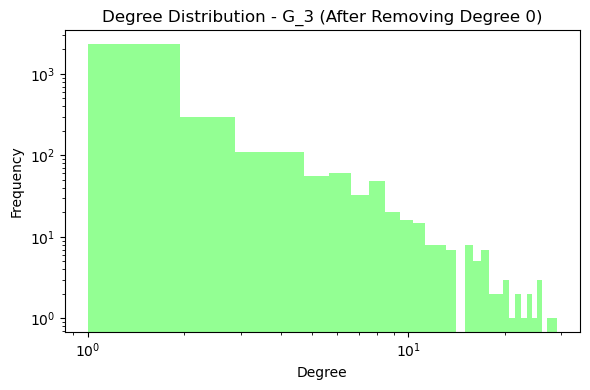

Properties for G_4 after removing nodes with degree 0:
  Node count: 402
  Edge count: 469
  Average degree: 2.3333333333333335
  Density: 0.005818786367414797
  Average clustering coefficient: 0.14746718346994994



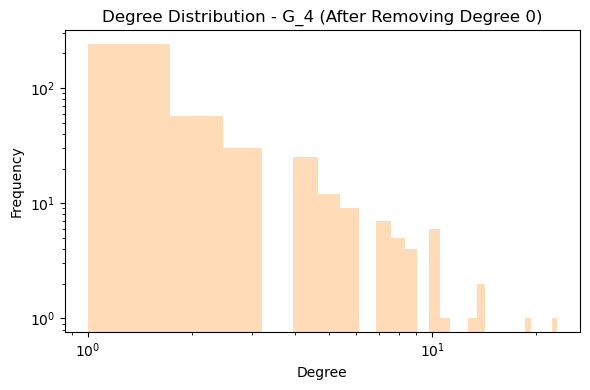

     Node count  Edge count  Average degree   Density  \
G_1     10734.0     13477.0        2.511086  0.000234   
G_2      5287.0      6355.0        2.404010  0.000455   
G_3      3149.0      3247.0        2.062242  0.000655   
G_4       402.0       469.0        2.333333  0.005819   

     Average clustering coefficient  
G_1                        0.033998  
G_2                        0.035416  
G_3                        0.022164  
G_4                        0.147467  


In [2]:
G_1 = nx.read_graphml("G_1.graphml")
G_2 = nx.read_graphml("G_2.graphml")
G_3 = nx.read_graphml("G_3.graphml")
G_4 = nx.read_graphml("G_4.graphml")

# Define the list of graphs and their names
graphs = [("G_1", G_1), ("G_2", G_2), ("G_3", G_3), ("G_4", G_4)]
graph_properties = {}

# Colors for degree distribution plots
colors = ['#FF9999', '#99CCFF', '#66FF66', '#FFCC99']

# Loop through each graph to remove nodes with degree 0, calculate properties, and plot degree distribution
for i, (graph_name, G) in enumerate(graphs):
    # Remove nodes with degree 0
    nodes_to_remove = [node for node, degree in dict(G.degree()).items() if degree == 0]
    G.remove_nodes_from(nodes_to_remove)
    
    # Calculate graph properties after removing nodes with degree 0
    properties = {
        "Node count": G.number_of_nodes(),
        "Edge count": G.number_of_edges(),
        "Average degree": sum(dict(G.degree()).values()) / G.number_of_nodes() if G.number_of_nodes() > 0 else 0,
        "Density": nx.density(G),
    }
    
    # Calculate clustering coefficient if the graph is not a multigraph
    if not isinstance(G, nx.MultiGraph):
        properties["Average clustering coefficient"] = nx.average_clustering(G)
    
    # Store properties for this graph
    graph_properties[graph_name] = properties
    
    # Print properties for each graph
    print(f"Properties for {graph_name} after removing nodes with degree 0:")
    for key, value in properties.items():
        print(f"  {key}: {value}")
    print()
    
    # Degree distribution
    degrees = [d for n, d in G.degree()]
    
    # Plot degree distribution
    plt.figure(figsize=(6, 4))
    plt.hist(degrees, bins=30, color=colors[i % len(colors)], alpha=0.7, log=True)
    plt.title(f'Degree Distribution - {graph_name} (After Removing Degree 0)')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.yscale('log')
    plt.xscale('log')
    plt.tight_layout()
    plt.show()

# Convert the graph properties to a DataFrame
properties_df = pd.DataFrame(graph_properties).transpose()
print(properties_df)

# Optionally, save the properties DataFrame to a CSV file
properties_df.to_csv('graph_properties.csv', index=True)